# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial'

In [4]:
print('Beginning Data Retrieval')
print('------------------------------')
records = 0
set_count = 1

for counter, city in enumerate(cities,1):
    if (counter%50==0 and counter>=50):
        set_count += 1
        records = 1
    else:
        records += 1
    
    try:
        query_url = f'{base_url}&q={city}'
        response = requests.get(query_url).json()
        print(f'Processing Record {records} of set {set_count} | {city}')
        
    except:
        print(f'Processing Record {records} of set {set_count} | {city} \nCity not found. Skipping...')
        pass

Beginning Data Retrieval
------------------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | kysyl-syr
Processing Record 3 of set 1 | astoria
Processing Record 4 of set 1 | bereda
Processing Record 5 of set 1 | ganzhou
Processing Record 6 of set 1 | hasaki
Processing Record 7 of set 1 | salinopolis
Processing Record 8 of set 1 | takoradi
Processing Record 9 of set 1 | macheng
Processing Record 10 of set 1 | mataura
Processing Record 11 of set 1 | quatre cocos
Processing Record 12 of set 1 | san patricio
Processing Record 13 of set 1 | san jose de gracia
Processing Record 14 of set 1 | kapaa
Processing Record 15 of set 1 | busselton
Processing Record 16 of set 1 | zhigansk
Processing Record 17 of set 1 | vila franca do campo
Processing Record 18 of set 1 | kruisfontein
Processing Record 19 of set 1 | punta arenas
Processing Record 20 of set 1 | saint george
Processing Record 21 of set 1 | yellowknife
Processing Record 22 of set 1 | victoria
Processing Re

Processing Record 50 of set 4 | san quintin
Processing Record 1 of set 5 | ostrovnoy
Processing Record 2 of set 5 | chokurdakh
Processing Record 3 of set 5 | souillac
Processing Record 4 of set 5 | kuna
Processing Record 5 of set 5 | parabel
Processing Record 6 of set 5 | verkhoyansk
Processing Record 7 of set 5 | turtkul
Processing Record 8 of set 5 | vanavara
Processing Record 9 of set 5 | ambon
Processing Record 10 of set 5 | malakal
Processing Record 11 of set 5 | mount gambier
Processing Record 12 of set 5 | wajir
Processing Record 13 of set 5 | capao da canoa
Processing Record 14 of set 5 | nome
Processing Record 15 of set 5 | tasiilaq
Processing Record 16 of set 5 | santa cruz
Processing Record 17 of set 5 | watrous
Processing Record 18 of set 5 | goderich
Processing Record 19 of set 5 | norman wells
Processing Record 20 of set 5 | tallahassee
Processing Record 21 of set 5 | padre paraiso
Processing Record 22 of set 5 | akdepe
Processing Record 23 of set 5 | port blair
Processin

Processing Record 48 of set 8 | sechura
Processing Record 49 of set 8 | san vicente
Processing Record 50 of set 8 | owando
Processing Record 1 of set 9 | tsumeb
Processing Record 2 of set 9 | jasper
Processing Record 3 of set 9 | pauini
Processing Record 4 of set 9 | tonj
Processing Record 5 of set 9 | sept-iles
Processing Record 6 of set 9 | pitimbu
Processing Record 7 of set 9 | carballo
Processing Record 8 of set 9 | west bay
Processing Record 9 of set 9 | anadyr
Processing Record 10 of set 9 | port-cartier
Processing Record 11 of set 9 | aripuana
Processing Record 12 of set 9 | dongsheng
Processing Record 13 of set 9 | kristiansund
Processing Record 14 of set 9 | nuuk
Processing Record 15 of set 9 | abnub
Processing Record 16 of set 9 | chacabuco
Processing Record 17 of set 9 | gizo
Processing Record 18 of set 9 | udachnyy
Processing Record 19 of set 9 | yarada
Processing Record 20 of set 9 | hami
Processing Record 21 of set 9 | mbanza-ngungu
Processing Record 22 of set 9 | sikasso

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
place = []
lat = []
lng = []
max_temp = []
hum = []
cloud = []
wind = []
country = []
date = []

for city in cities:
    try:
        query_url = f'{base_url}&q={city}'
        response = requests.get(query_url).json()
        place.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except:
        pass

In [29]:
d={'City': place,
  'Lat': lat,
  'Lng': lng,
  'Max Temp': max_temp,
  'Humidity': hum,
  'Cloudiness': cloud,
  'Wind Speed': wind,
  'Country': country,
  'Date': date}

weather_data = pd.DataFrame(d)
weather_data.to_csv(output_data_file, index=False)
weather_data.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [7]:
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.23,77,0,18.32,PF,1595792995
1,Kysyl-Syr,63.90,122.76,51.80,90,25,1.21,RU,1595792785
2,Astoria,46.19,-123.83,80.60,44,1,12.75,US,1595792786
3,Bereda,43.27,-7.54,71.01,78,0,7.00,ES,1595792742
4,Ganzhou,28.82,115.43,77.83,90,100,2.66,CN,1595792786


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,5.350000e+02
mean,19.673794,14.218336,70.593252,69.532710,49.229907,8.114542,1.595793e+09
std,33.056400,88.894457,14.468663,20.197488,39.037069,5.015567,1.853649e+02
min,-54.800000,-179.170000,33.800000,8.000000,0.000000,0.430000,1.595792e+09
25%,-7.590000,-63.905000,59.000000,57.500000,4.000000,4.340000,1.595793e+09
50%,21.430000,17.720000,72.250000,74.000000,41.000000,7.000000,1.595793e+09
75%,48.980000,86.500000,81.230000,84.000000,90.000000,11.150000,1.595793e+09
max,78.220000,179.320000,105.800000,100.000000,100.000000,25.280000,1.595793e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Observations on 7/26/2020: From the scatter plot below it can be seen the max temperatures are the greatest between 20 degrees and 40 degrees latitude, which is slightly off the equator. Also it appears, the Northern Hemisphere (greater than 0) has more high temperature cities, it may just be the random sample used.

In [9]:
latitude = weather_data['Lat']

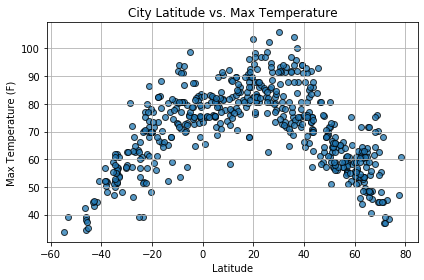

In [12]:
temperature = weather_data['Max Temp']

plt.scatter(latitude,temperature, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.grid()
plt.tight_layout()
plt.savefig('../output_data/LatvsTemp.png')
plt.show()

## Latitude vs. Humidity Plot

Observations on 7/26/2020: According to the scatter plot below, humidity does not have a relationship with latitude. The sample data does contain a lot of cities with mid-high levels of humidity however.

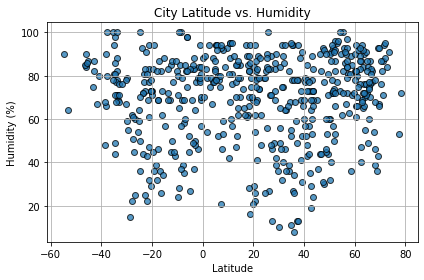

In [13]:
humidity = weather_data['Humidity']

plt.scatter(latitude,humidity, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.grid()
plt.tight_layout()
plt.savefig('../output_data/LatvsHum.png')
plt.show()

## Latitude vs. Cloudiness Plot

Observations on 7/26/2020: Based on the scatter plot below, it does not appear cloudiness has any relationship with lattitude either. The data points are completely dispersed and show no pattern.

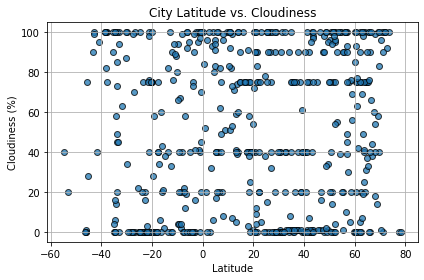

In [14]:
cloudiness = weather_data['Cloudiness']

plt.scatter(latitude,cloudiness, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.grid()
plt.tight_layout()
plt.savefig('../output_data/LatvsCloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

Observations on 7/26/2020: Based on the scatter plot below, it appears the sample data set used contains cities with low-mid windspeeds as majority of the points are below 10mph. However, it is difficult to see any correlation with latitude.

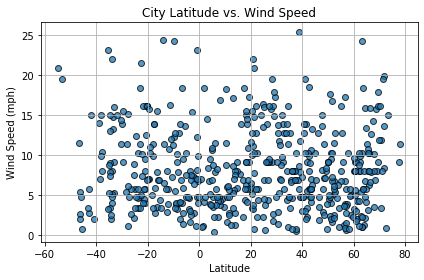

In [16]:
wind_speed = weather_data['Wind Speed']

plt.scatter(latitude,wind_speed, edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.grid()
plt.tight_layout()
plt.savefig('../output_data/LatvsWind.png')
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def lin_reg (x,y,label,x1,y1):
    """
    :param x: x values to be plotted
    :type x: list/series
    :param y: y values to be plotted
    :type y: list/series
    :param label: y label on plot
    :type label: string
    :param x1: x location of the regression line equation annotation on plot
    :type x1: integer
    :param y1: y location of the regression line equation annotation on plot
    :type y1: integer
    
    :example: 
    
    lin_reg(N_lat,N_temp,'Max Temperature (F)', 0, 280)
    
    """
   
    
    plt.scatter(x,y, edgecolors='black', alpha=0.75)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.plot(x, regress_values, 'r-')
    print(f'The r-squared value is {rvalue}')
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(x1,y1),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(label)
    plt.grid()
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames
N_hem = weather_data.loc[weather_data['Lat']>=0]
S_hem = weather_data.loc[weather_data['Lat']<0]

In [19]:
N_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kysyl-Syr,63.90,122.76,51.80,90,25,1.21,RU,1595792785
2,Astoria,46.19,-123.83,80.60,44,1,12.75,US,1595792786
3,Bereda,43.27,-7.54,71.01,78,0,7.00,ES,1595792742
4,Ganzhou,28.82,115.43,77.83,90,100,2.66,CN,1595792786
5,Hasaki,35.73,140.83,75.20,94,75,6.93,JP,1595792999


In [20]:
# x values used for the Northern and Southern Hemisphere plots.
N_lat = N_hem['Lat']
S_lat = S_hem['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Observations on 7/26/2020: Based on the linear regression below, it can be seen that there is a negative correlation between temperature and latitude. In other words, as your latitude increases (you are moving away from the Equator towards the North Pole), your temperature drops. The results are intuitive and make sense.

The r-squared value is -0.7117087404984138


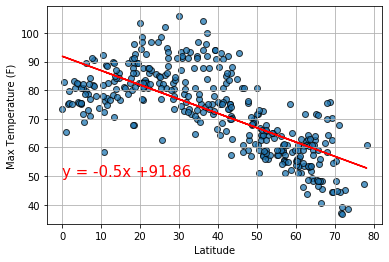

<Figure size 432x288 with 0 Axes>

In [21]:
N_temp = N_hem['Max Temp']

lin_reg(N_lat,N_temp,'Max Temperature (F)',0,50)
plt.savefig('../output_data/NorthTemp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Observations on 7/26/2020: Based on the linear regression below, it is possible to see a positive correlation. As the latitude increases (moving closer to the Equator from the South Pole), the temperatures rise. Again, this is also intuitive and makes sense.

The r-squared value is 0.7952336888564763


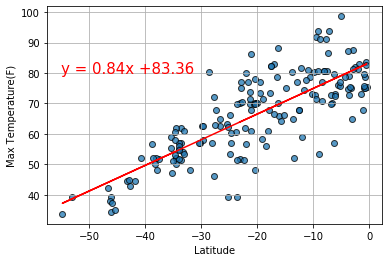

<Figure size 432x288 with 0 Axes>

In [22]:
S_temp = S_hem['Max Temp']

lin_reg(S_lat,S_temp,'Max Temperature(F)',-55,80)
plt.savefig('../output_data/SouthTemp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Observations on 7/26/2020: According to the linear regression, there appears to be close to no correlation between the latitude and humidity, which is what was predicted earlier.

The r-squared value is 0.0460180393564523


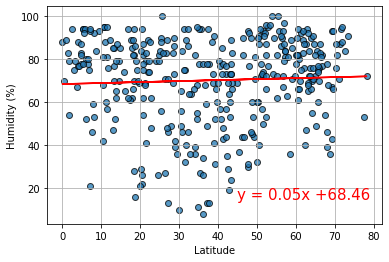

<Figure size 432x288 with 0 Axes>

In [23]:
N_hum = N_hem['Humidity']

lin_reg(N_lat,N_hum,'Humidity (%)',45,15)
plt.savefig('../output_data/NorthHumidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Observations on 7/26/2020: There appears to be a slight negative correlation in the Southern Hemisphere between latitude and humidity. As the Equator is approached, the humidity drops slightly.

The r-squared value is -0.14056582905526105


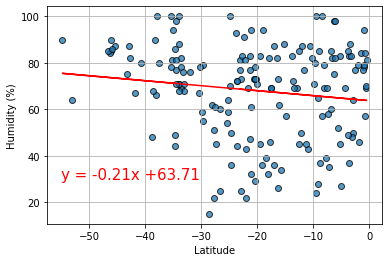

<Figure size 432x288 with 0 Axes>

In [24]:
S_hum = S_hem['Humidity']

lin_reg(S_lat,S_hum,'Humidity (%)',-55,30)
plt.savefig('../output_data/SouthHumidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Observations on 7/26/2020: In the Northern Hemisphere, there seems to be barely any correlation between latitude and cloudiness. The data is evenly distributed across.

The r-squared value is 0.00875186788985843


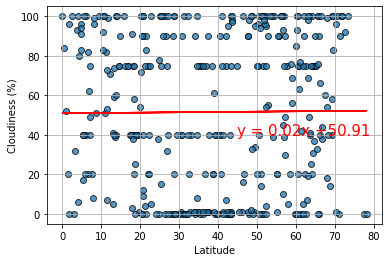

<Figure size 432x288 with 0 Axes>

In [25]:
N_cloud = N_hem['Cloudiness']

lin_reg(N_lat,N_cloud,'Cloudiness (%)',45,40)
plt.savefig('../output_data/NorthCloud.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Observations on 7/26/2020: In the Southern Hemisphere, there is appears to be no correlation.

The r-squared value is -0.007339271095973291


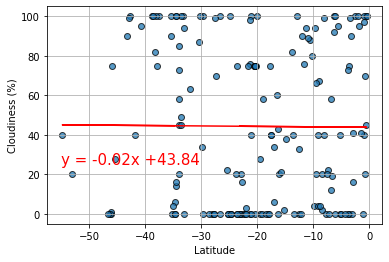

<Figure size 432x288 with 0 Axes>

In [26]:
S_cloud = S_hem['Cloudiness']

lin_reg(S_lat,S_cloud,'Cloudiness (%)',-55,25)
plt.savefig('../output_data/SouthCloud.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Observations on 7/26/2020: There appears to be no relationship between latitude and wind speed in the Northern Hemisphere.

The r-squared value is 0.02633141942490091


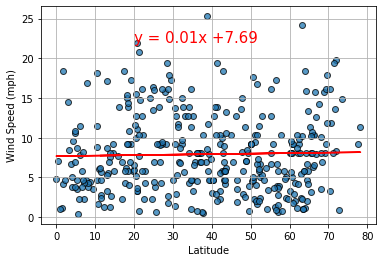

<Figure size 432x288 with 0 Axes>

In [27]:
N_wind = N_hem['Wind Speed']

lin_reg(N_lat,N_wind,'Wind Speed (mph)',20,22)
plt.savefig('../output_data/NorthWind.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Observations on 7/26/2020: There seems to be a slightly negative correlation between latitude and wind speed in the Southern Hemisphere. The closer to the Equator, the lower the wind speed.

The r-squared value is -0.09993724277190628


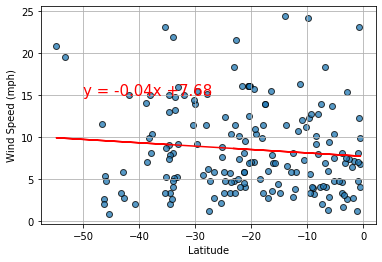

<Figure size 432x288 with 0 Axes>

In [28]:
S_wind = S_hem['Wind Speed']

lin_reg(S_lat,S_wind,'Wind Speed (mph)',-50,15)
plt.savefig('../output_data/SouthWind.png')